<div class="markdown-google-sans">
  <h1>CPE232 Final Project</h2>
</div>

# Data Preparation

## Import Dataset

In [1163]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [1164]:
df = pd.read_csv('housing.csv')

In [1165]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [1166]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


## Cleaning Data

In [1167]:
df.isnull().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms         True
population            False
households            False
median_income         False
median_house_value    False
ocean_proximity       False
dtype: bool

In [1168]:
df.fillna(0, inplace=True)
df.isnull().any()

longitude             False
latitude              False
housing_median_age    False
total_rooms           False
total_bedrooms        False
population            False
households            False
median_income         False
median_house_value    False
ocean_proximity       False
dtype: bool

In [1169]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,532.476211,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,422.678333,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,0.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,292.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,431.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [1170]:
df['ocean_proximity'].value_counts()

ocean_proximity
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: count, dtype: int64

In [1171]:
df = df[df['ocean_proximity'] != 'ISLAND']

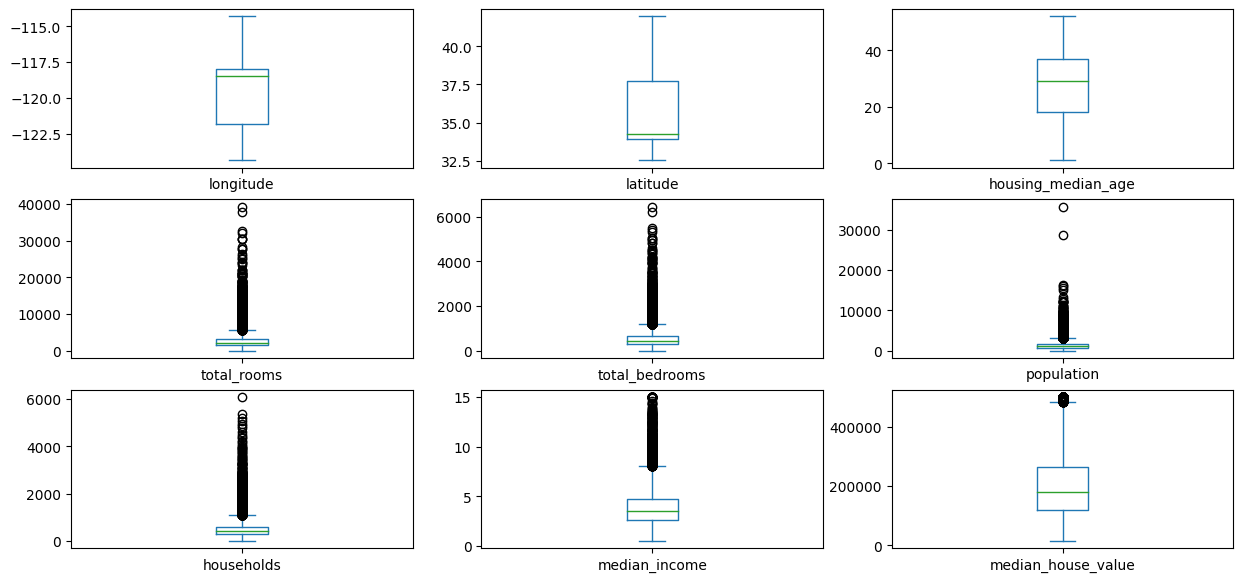

In [1172]:
df.plot(kind='box', subplots=True, layout=(3,3), figsize=(15,7))
plt.show()

In [1173]:
df['median_house_value'].value_counts()

median_house_value
500001.0    965
137500.0    122
162500.0    117
112500.0    103
187500.0     93
           ... 
54900.0       1
304200.0      1
377600.0      1
81200.0       1
47000.0       1
Name: count, Length: 3842, dtype: int64

In [1174]:
df[df['median_house_value'] == df['median_house_value'].max()]['median_house_value'].count() / df['median_house_value'].count()

0.0467652047492125

In [1175]:
df=df[df['total_rooms']<df['total_rooms'].quantile(0.83)]
df=df[df['total_bedrooms']<df['total_bedrooms'].quantile(0.95)]
df=df[df['population']<df['population'].quantile(0.95)]
df=df[df['households']<df['households'].quantile(0.95)]
df=df[df['median_house_value']<df['median_house_value'].quantile(0.92)]
df=df[df['median_income']<df['median_income'].quantile(0.97)]

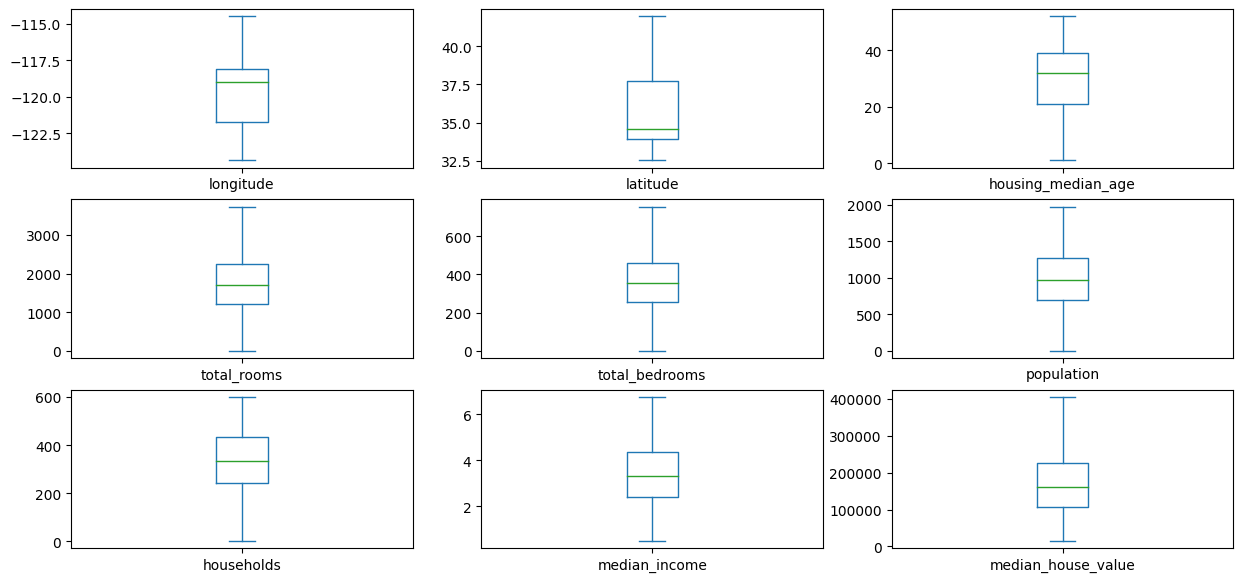

In [1176]:
df.plot(kind='box', subplots=True, layout=(3,3), figsize=(15,7))
plt.show()

# Exploratory Data Analysis

Text(0.5, 1.0, 'Distribution of Median Age of the House')

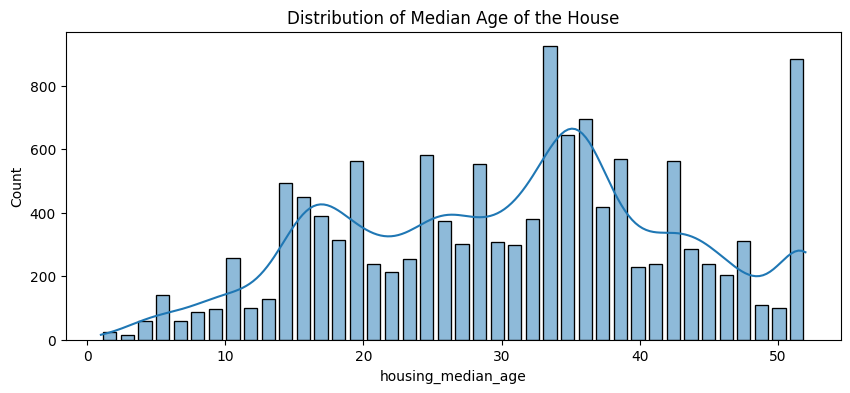

In [1177]:
plt.figure(figsize = (10,4))
sns.histplot(data=df, x='housing_median_age', bins=40, kde=True, shrink = 0.75)
plt.title('Distribution of Median Age of the House')

Text(0.5, 1.0, 'Distribution of Total Rooms')

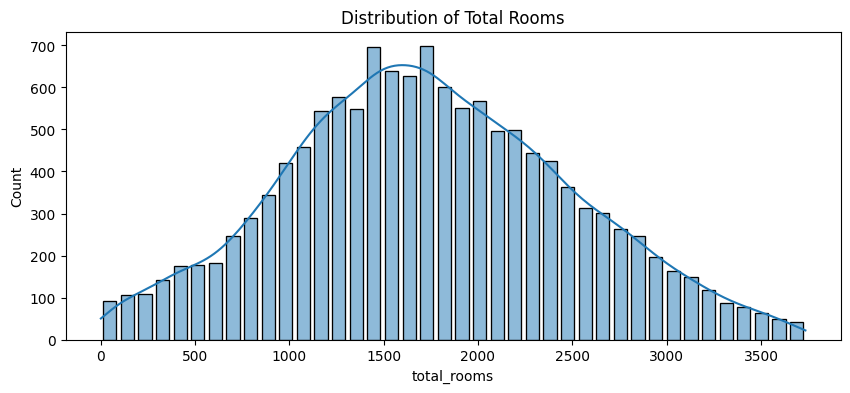

In [1178]:
plt.figure(figsize = (10,4))
sns.histplot(data=df, x='total_rooms', bins=40, kde=True, shrink = 0.75)
plt.title('Distribution of Total Rooms')

Text(0.5, 1.0, 'Distribution of Total Bedrooms')

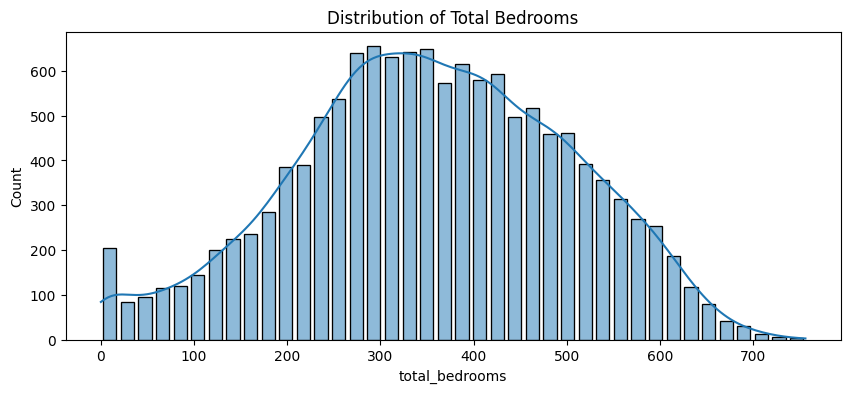

In [1179]:
plt.figure(figsize = (10,4))
sns.histplot(data=df, x='total_bedrooms', bins=40, kde=True, shrink = 0.75)
plt.title('Distribution of Total Bedrooms')

Text(0.5, 1.0, 'Distribution of Population')

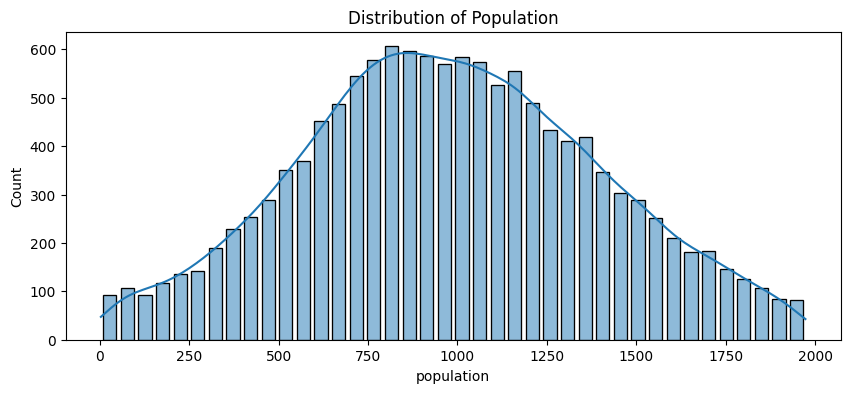

In [1180]:
plt.figure(figsize = (10,4))
sns.histplot(data=df, x='population', bins=40, kde=True, shrink = 0.75)
plt.title('Distribution of Population')

Text(0.5, 1.0, 'Distribution of Households')

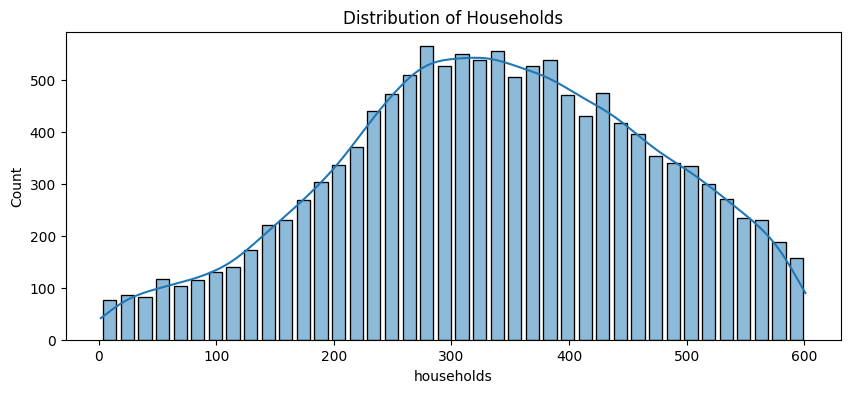

In [1181]:
plt.figure(figsize = (10,4))
sns.histplot(data=df, x='households', bins=40, kde=True, shrink = 0.75)
plt.title('Distribution of Households')

Text(0.5, 1.0, 'Distribution of Median of Income')

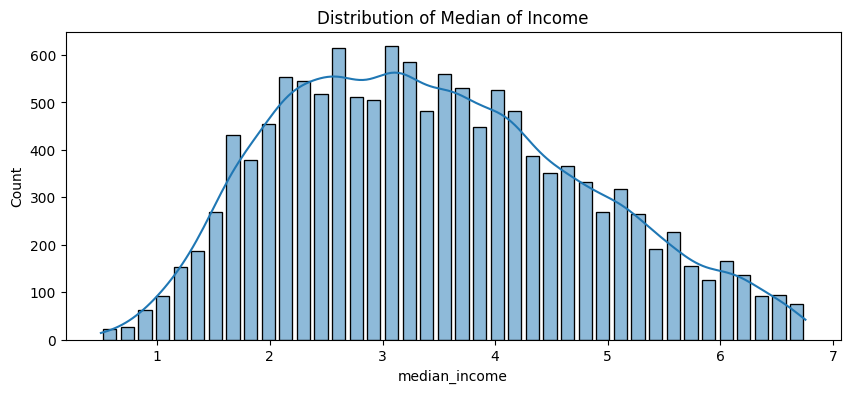

In [1182]:
plt.figure(figsize = (10,4))
sns.histplot(data=df, x='median_income', bins=40, kde=True, shrink = 0.75)
plt.title('Distribution of Median of Income')

Text(0.5, 1.0, 'Distribution of Median of House Value')

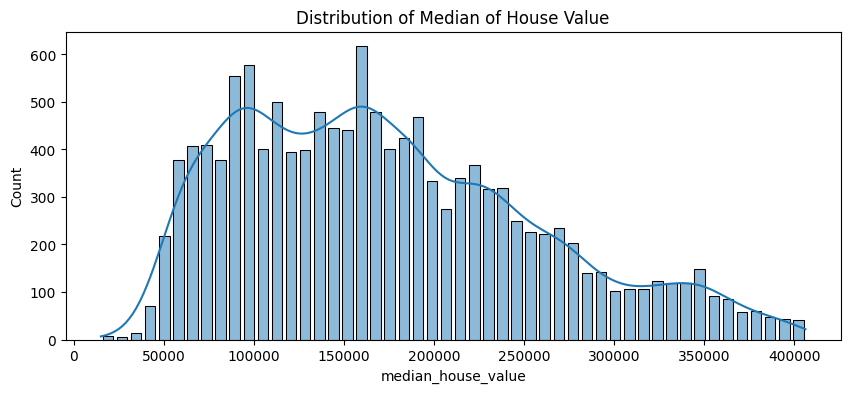

In [1183]:
plt.figure(figsize = (10,4))
sns.histplot(data=df, x='median_house_value', bins=50, kde=True, shrink = 0.75)
plt.title('Distribution of Median of House Value')

Text(0.5, 1.0, 'Distribution of Distance from Ocean')

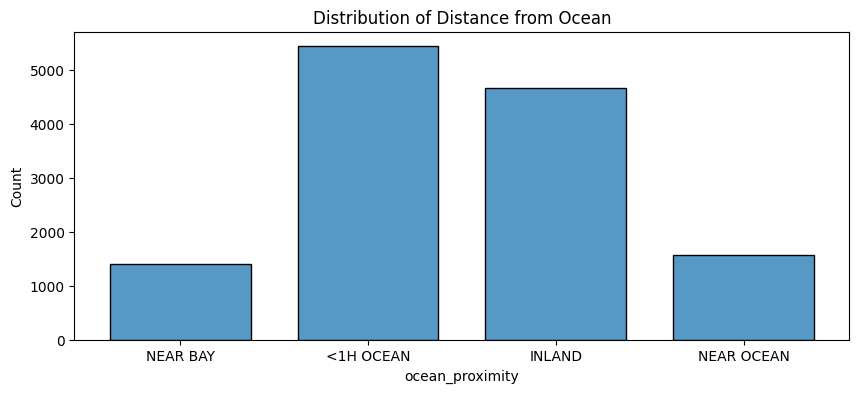

In [1184]:
plt.figure(figsize = (10,4))
sns.histplot(data=df, x='ocean_proximity',  shrink = 0.75)
plt.title('Distribution of Distance from Ocean')

<Axes: >

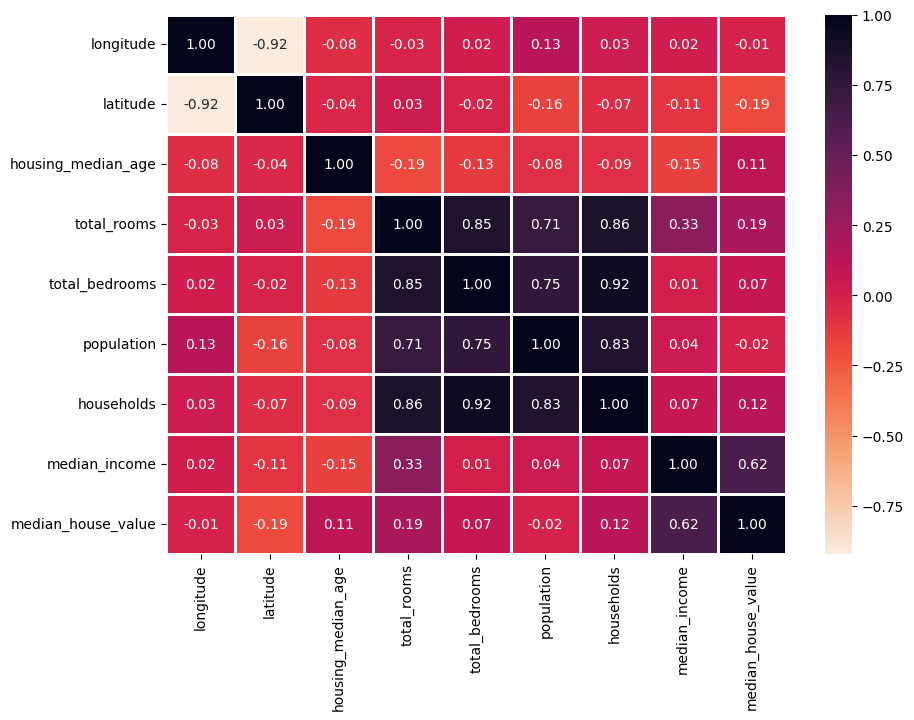

In [1188]:
plt.figure(figsize= (10,7))
df_forCorr = df.drop(columns='ocean_proximity')
sns.heatmap(df_forCorr.corr() , annot = True , linewidths= .9 , fmt = '.2f', cmap='rocket_r' )

In [1189]:
fig = px.box(df, x="ocean_proximity", y="median_house_value", template='plotly_white', title='<b>Boxplots', color='ocean_proximity')
fig.update_layout(title_x=0.5)
fig.show()

Text(0.5, 1.0, 'Median of house value in California')

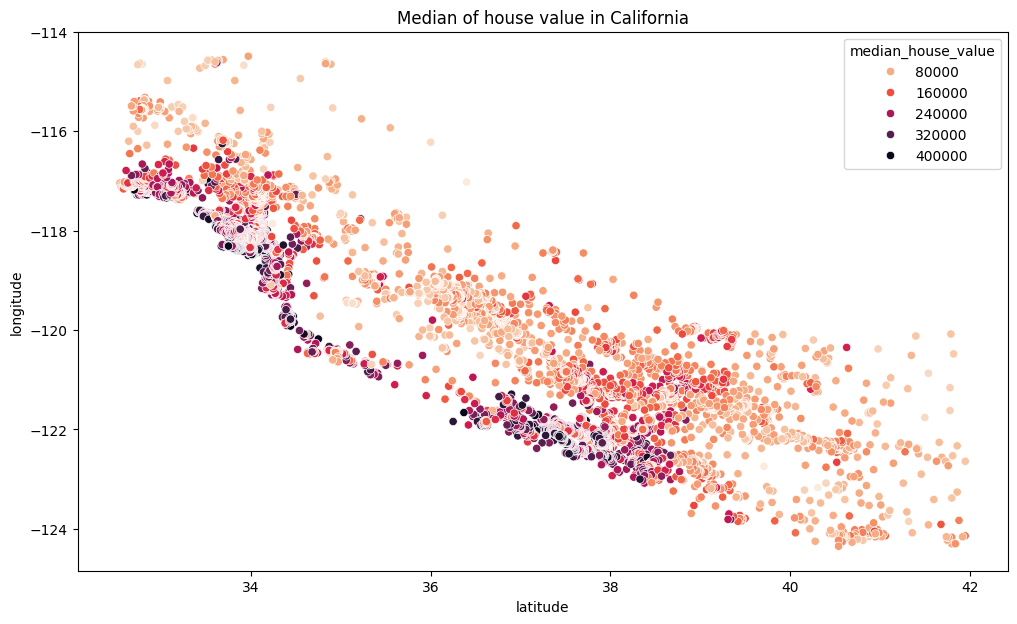

In [1190]:
plt.figure(figsize = (12,7))
sns.scatterplot(x = 'latitude' , y = 'longitude' , data = df , hue = 'median_house_value' , palette = 'rocket_r')
plt.title('Median of house value in California')

Text(0.5, 1.0, 'Population density in California')

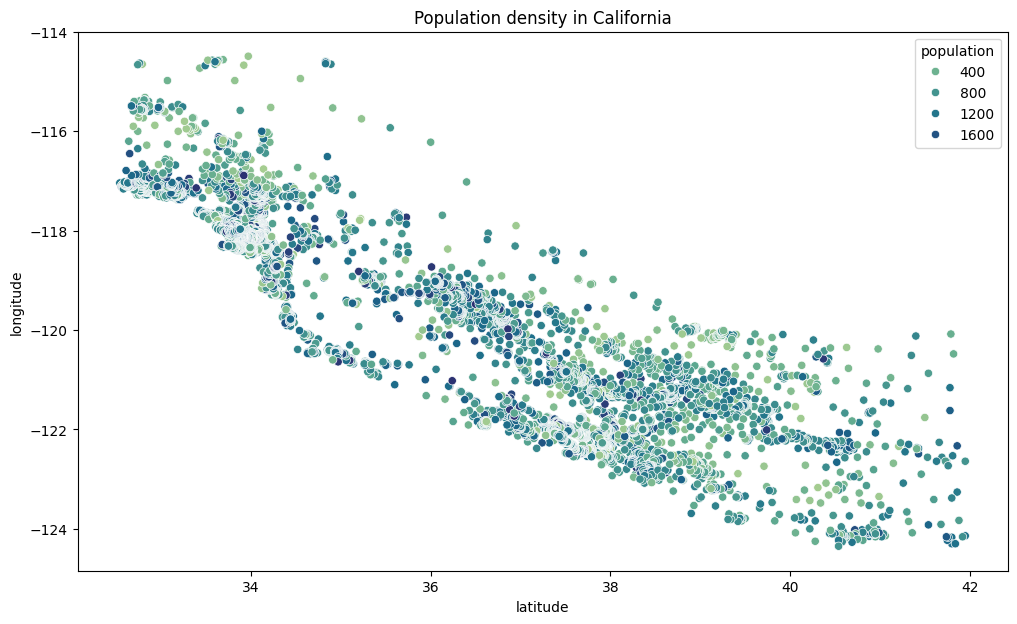

In [1191]:
plt.figure(figsize = (12,7))
sns.scatterplot(x = 'latitude' , y = 'longitude' , data = df , hue = 'population' , palette = 'crest')
plt.title('Population density in California')

Text(0.5, 1.0, 'Population vs Total rooms')

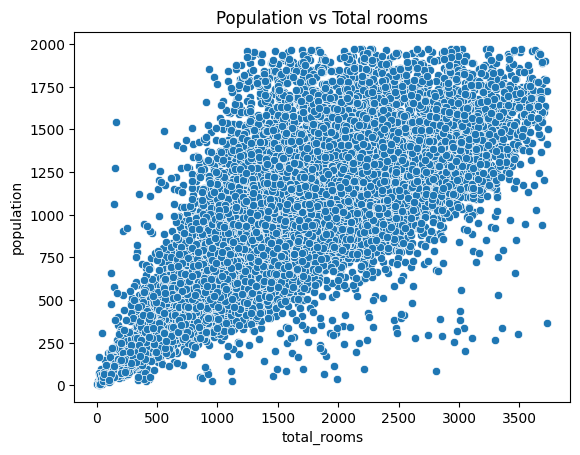

In [1192]:
sns.scatterplot(data=df, x="total_rooms", y="population")
plt.title('Population vs Total rooms')

Text(0.5, 1.0, 'Households vs Total rooms')

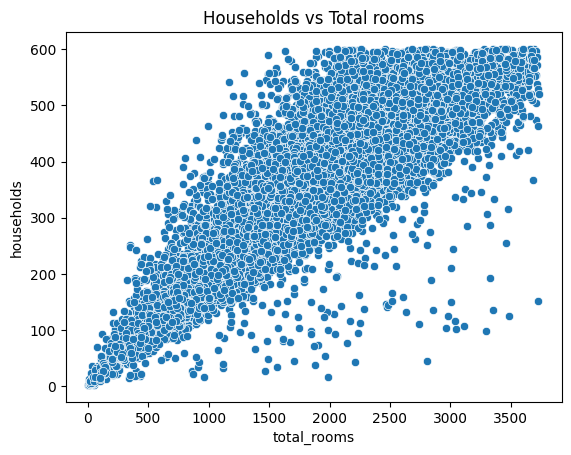

In [1193]:
sns.scatterplot(data=df, x="total_rooms", y="households")
plt.title('Households vs Total rooms')

Text(0.5, 1.0, 'Median house value vs Median income')

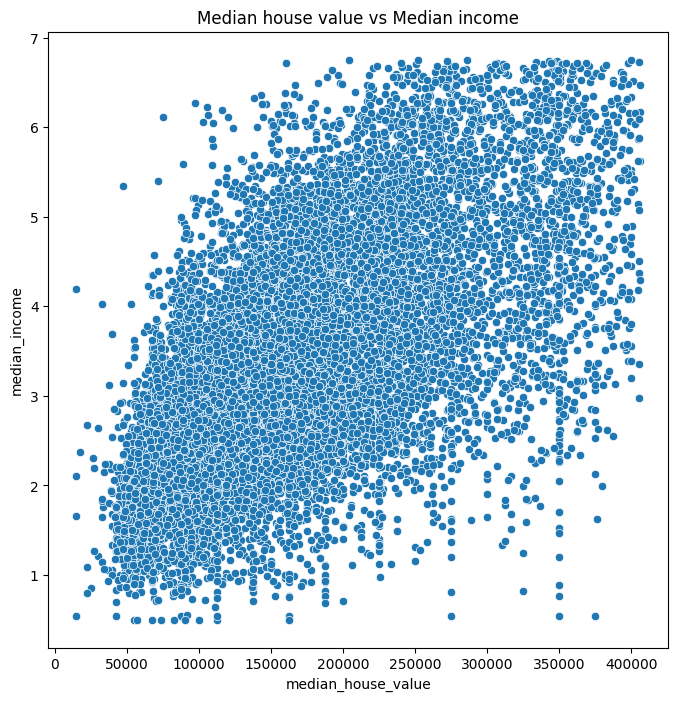

In [1194]:
plt.figure(figsize = (8,8))
sns.scatterplot(data=df, x="median_house_value", y="median_income")
plt.title('Median house value vs Median income')

# Data Modeling

##  Linear Regression

In [1217]:
df_prep = df

ocean_prox_mapping = {'<1H OCEAN': 1, 'INLAND': 2, 'NEAR OCEAN': 3, 'NEAR BAY': 4}
df_prep['ocean_proximity'] = df['ocean_proximity'].replace(ocean_prox_mapping)
df_prep.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,4
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,4
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,4
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,4
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,4


In [1207]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

df_train, df_test = train_test_split(df_prep, test_size=0.3)

scaler = StandardScaler()

x_train = df_train.drop(columns='median_house_value')
y_train = df_train['median_house_value']
x_train_scaled = scaler.fit_transform(x_train)

x_test = df_test.drop(columns='median_house_value')
y_test = df_test['median_house_value']
x_test_scaled = scaler.fit_transform(x_test)

reg = LinearRegression()
reg.fit(x_train_scaled, y_train)

LinearRegression()

In [1208]:
reg.score(x_test_scaled, y_test)

0.5972039031286094

Text(0, 0.5, 'Predicted House Value')

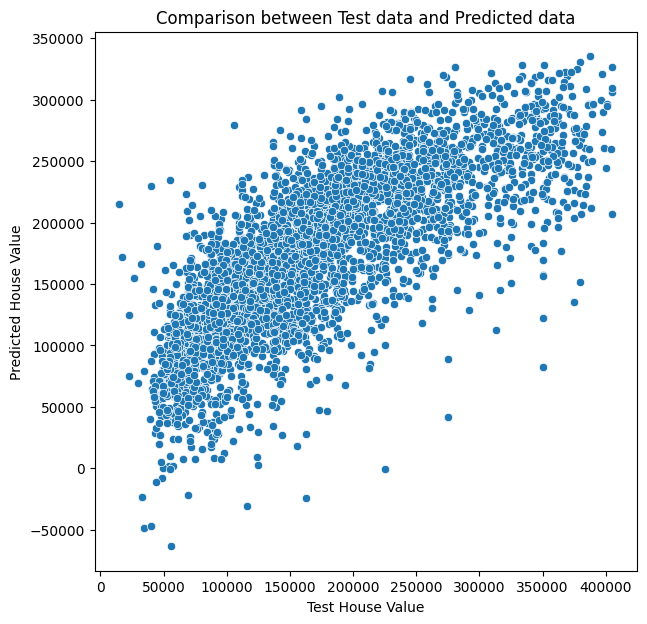

In [1209]:
houseValue_predict = reg.predict(x_test_scaled)

plt.figure(figsize = (7,7))
sns.scatterplot(x=y_test, y=houseValue_predict)
plt.title('Comparison between Test data and Predicted data')
plt.xlabel('Test House Value')
plt.ylabel('Predicted House Value')

In [1210]:
rmse = np.sqrt(mean_squared_error(y_test,houseValue_predict))
r2 = r2_score(y_test, houseValue_predict)
print(f"R squared score : {r2}\nRMSE : {rmse}")


R squared score : 0.5972039031286094
RMSE : 52097.11923293729


##  Random Forest Regression

In [1211]:
from sklearn.ensemble import RandomForestRegressor

In [1212]:
RF_reg = RandomForestRegressor()
RF_reg.fit(x_train_scaled, y_train)

RandomForestRegressor()

In [1213]:
RF_reg.score(x_test_scaled, y_test)

0.7538300741104115

Text(0, 0.5, 'Predicted House Value')

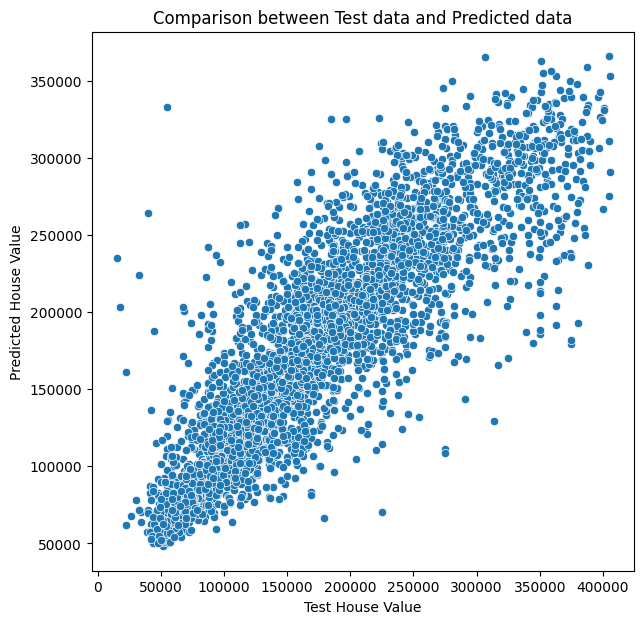

In [1214]:
RF_houseValue_predict = RF_reg.predict(x_test_scaled)
plt.figure(figsize = (7,7))
sns.scatterplot(x=y_test, y=RF_houseValue_predict)
plt.title('Comparison between Test data and Predicted data')
plt.xlabel('Test House Value')
plt.ylabel('Predicted House Value')

In [1215]:
rmse = np.sqrt(mean_squared_error(y_test,RF_houseValue_predict))
r2 = r2_score(y_test, RF_houseValue_predict)
print(f"R squared score : {r2}\nRMSE : {rmse}")

R squared score : 0.7538300741104115
RMSE : 40727.577602059224


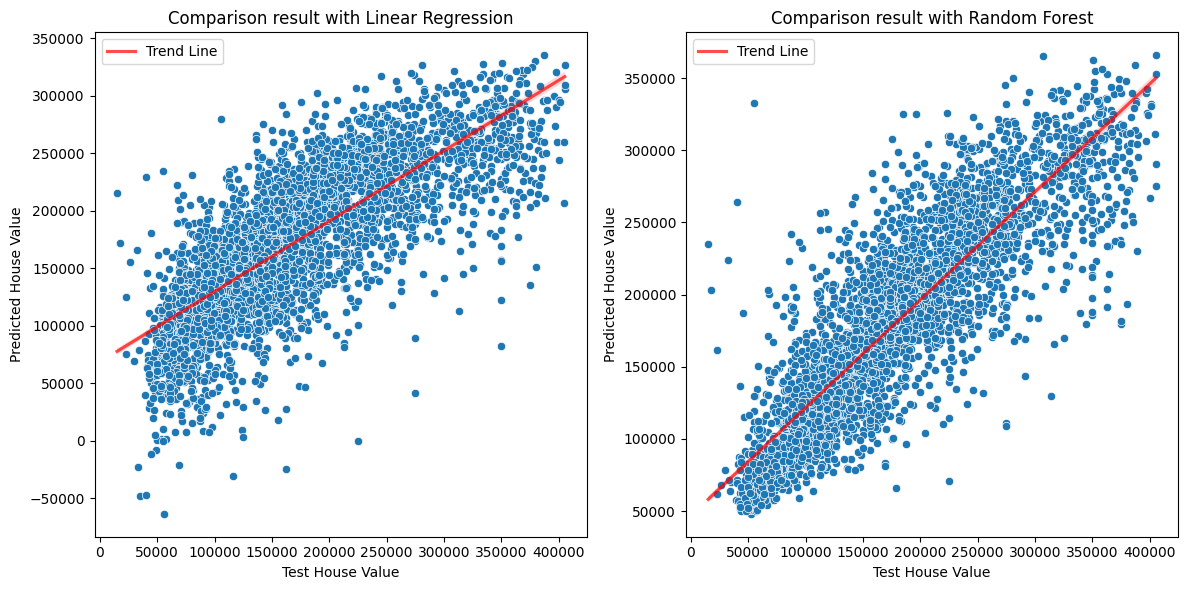

In [1216]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))  # 1 row, 2 columns

# First subplot (scatter plot with trend line for houseValue_predict)
sns.scatterplot(x=y_test, y=houseValue_predict, ax=axes[0])
sns.regplot(x=y_test, y=houseValue_predict, scatter=False, color='red', label='Trend Line', line_kws={'alpha': 0.7}, ax=axes[0])
axes[0].set_title('Comparison result with Linear Regression')
axes[0].set_xlabel('Test House Value')
axes[0].set_ylabel('Predicted House Value')
axes[0].legend()

# Second subplot (scatter plot with trend line for RF_houseValue_predict)
sns.scatterplot(x=y_test, y=RF_houseValue_predict, ax=axes[1])
sns.regplot(x=y_test, y=RF_houseValue_predict, scatter=False, color='red', label='Trend Line', line_kws={'alpha': 0.7}, ax=axes[1])
axes[1].set_title('Comparison result with Random Forest')
axes[1].set_xlabel('Test House Value')
axes[1].set_ylabel('Predicted House Value')
axes[1].legend()

# Adjust layout and display the figure
plt.tight_layout()
plt.show()